Nome: Daniel Oliveira dos Santos            
Matrícula: 564307         
Nível: Mestrado              
Email: daniel.odossantos@alu.ufc.br         
Área: Ciência da Computação    
Disciplina: Tópicos especiais em lógica 1     
LISTA 02
Google drive do código:
https://drive.google.com/drive/folders/11YfN480FGyW_78dfHx02aIbSnkcKyYG3?usp=sharing


Preparando o Dataset

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# BIBLIOTECAS

# tratamento de dados
import pandas as pd
import numpy as np

# Calculos matemática e estatística
import math
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import t

# Gráficos
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# adicionando constante bias para regressão linear
import statsmodels.api as sm


from scipy.stats import norm
from sklearn.metrics import accuracy_score

In [3]:

linear_regression_link = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/2_semestre/topicos_especiais_em_logica_1/Lista_02/linear_regression_data.csv'
logistic_regression_link = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/2_semestre/topicos_especiais_em_logica_1/Lista_02/logistic_regression_data.csv'
polynomial_regression_link = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/2_semestre/topicos_especiais_em_logica_1/Lista_02/polynomial_regression_data.csv'

linear_regression_data     = pd.read_csv(linear_regression_link, header=None)
logistic_regression_data   = pd.read_csv(logistic_regression_link, header=None)
polynomial_regression_data = pd.read_csv(polynomial_regression_link, header=None)

# **Gráficos e Relátorios**

In [4]:
def relatorio(rel):
    cabecalho = {
        'selector': 'th',
        'props': 'font-family: Helvetica; color: #dddd55; background-color: #34495E; text-align: center;'
    }

    celulas = {
        'selector': 'td',
        'props': 'font-family: Helvetica; color: white; background-color: #34495E; text-align: left;'
    }


    estilo_01 = rel.style.format('{:.2f}')
    return estilo_01.set_table_styles([cabecalho, celulas])

# =======================================================================================================


def grafico_priori(dados_prior, titulo=None):

    if titulo is None:
      titulo = f'Predição a Priori com Incerteza'
    else:
      titulo = f'Predição a Priori com Incerteza {titulo}'

    # Gráfico a Priori
    fig_a_priori = go.Figure()

    fig_a_priori.add_trace(go.Scatter(x=dados_prior['x'], y=dados_prior['y'], mode='markers', name='Dados Originais'))
    fig_a_priori.add_trace(go.Scatter(x=dados_prior['x'], y=dados_prior['y_prior'], mode='lines', name='Predição a Priori', line=dict(color='red')))
    fig_a_priori.add_trace(go.Scatter(
        x=np.concatenate([dados_prior['x'], dados_prior['x'][::-1]]),
        y=np.concatenate([dados_prior['y_prior_high'], dados_prior['y_prior_low'][::-1]]),
        fill='toself',
        fillcolor='rgba(0, 255, 0, 0.3)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=True,
        name='Incerteza a Priori (±2σ)'
    ))
    fig_a_priori.update_layout(
        title= titulo,
        xaxis_title='X (Variável Independente)',
        yaxis_title='y (Variável Dependente)'
    )
    fig_a_priori.show()


def grafico_posteriori(dados_post, titulo=None):

    if titulo is None:
      titulo = f'Predição a Posteriori com Incerteza'
    else:
      titulo = f'Predição a Posteriori com Incerteza {titulo}'

    # Gráfico a Posteriori
    fig_a_posteriori = go.Figure()
    fig_a_posteriori.add_trace(go.Scatter(x=dados_post['x'], y=dados_post['y'], mode='markers', name='Dados Originais'))
    fig_a_posteriori.add_trace(go.Scatter(x=dados_post['x'], y=dados_post['y_post'], mode='lines', name='Predição a Posteriori', line=dict(color='blue')))
    fig_a_posteriori.add_trace(go.Scatter(
        x=np.concatenate([dados_post['x'], dados_post['x'][::-1]]),
        y=np.concatenate([dados_post['y_post_high'], dados_post['y_post_low'][::-1]]),
        fill='toself',
        fillcolor='rgba(255, 165, 0, 0.3)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=True,
        name='Incerteza a Posteriori (±2σ)'
    ))
    fig_a_posteriori.update_layout(
        title= titulo,
        xaxis_title='X (Variável Independente)',
        yaxis_title='y (Variável Dependente)'
    )
    fig_a_posteriori.show()

================================================================================

1. Implemente um modelo de regressão linear Bayesiana para os dados disponíveis em linear regression data.csv.\
Apresente os seguintes gráficos:

In [37]:

# Treinamento do Naive Bayes Gaussiano para Regressão Linear
def naive_bayes_regressao_linear(X, y, beta ,alpha):
  # 2. Parâmetros iniciais
  # alpha = 2.0  Precisão a priori dos pesos (1 / variância)
  # beta = 25.0  Precisão dos dados observados (1 / variância do erro)
    """
    Treina o modelo Naive Bayes para regressão linear.

    Parâmetros:
    - X: Matriz (amostras x características) com os dados de treino.
    - y: Valores contínuos (variável dependente).

    Retorna:
    - medias: Vetor com as médias de cada característica em relação aos valores de saída.
    - variancias: Vetor com as variâncias de cada característica.
    - probabilidade_a_priori: Média geral do conjunto de dados.
    """


    # Inicializar média a priori com uma regressão linear inicial
    regressao = np.linalg.pinv(X.T @ X) @ X.T @ y
    media_priori = regressao  # Usar coeficientes da regressão linear como ponto de partida
    media_priori = np.array(media_priori) # Transformando em uma array
    variancia_priori = (1 / alpha) * np.eye(X.shape[1])  # Variância a priori dos pesos


    #medias = np.mean(X, axis=0)
    #variancias = np.var(X, axis=0)

    # 3. Atualização posteriori
    # Calcula a matriz de covariância da posteriori
    variancia_posteriori = np.linalg.inv(np.linalg.inv(variancia_priori) + beta * X.T @ X)
    # Calcula a média da posteriori
    media_posteriori = variancia_posteriori @ (beta * X.T @ y)

    return media_priori, variancia_priori, media_posteriori, variancia_posteriori

# beta = 25.0,alpha = 2.0
# Função para prever valores contínuos
def prever_naive_bayes_regressao(X, y,beta = 25.0,alpha = 2.0):


    """
    Prediz os valores contínuos com base no modelo Naive Bayes treinado.

    Parâmetros:
    - X: Matriz (amostras x características) com os dados de entrada.
    - medias: Vetor de médias das características.
    - variancias: Vetor de variâncias das características.
    - probabilidade_a_priori: Média geral do conjunto de treino.

    Retorna:
    - y_pred: Vetor com os valores previstos.
    """
    # Adiciona o termo de bias (coluna de 1s para w0)
    X_bias = sm.add_constant(X)

    media_priori, variancia_priori, media_posteriori, variancia_posteriori = naive_bayes_regressao_linear(X_bias, y,beta ,alpha)

    # 4. Predições
    # Predição a priori
    y_prior = X_bias @ media_priori  # Média da predição a priori
    y_prior_var = np.sum(X_bias @ variancia_priori * X_bias, axis=1)  # Variância a priori


    # Predição a posteriori
    y_post = X_bias @ media_posteriori  # Média da predição a posteriori
    y_post_var = np.sum(X_bias @ variancia_posteriori * X_bias, axis=1)  # Variância a posteriori


    return y_prior, y_prior_var, y_post, y_post_var



def gerar_dados_priori_posteriori(y_prior, y_prior_var, y_post, y_post_var, dados):
    y_prior_var = np.maximum(y_prior_var, 1e-8)
    y_post_var = np.maximum(y_post_var, 1e-8)

    # Calcular os intervalos de incerteza (±2σ)
    y_prior_low = y_prior - 2 * np.sqrt(y_prior_var)
    y_prior_high = y_prior + 2 * np.sqrt(y_prior_var)


    y_post_low = y_post - 2 * np.sqrt(y_post_var)
    y_post_high = y_post + 2 * np.sqrt(y_post_var)

    dados_prior = pd.DataFrame({
        'x': dados[0],
        'y': dados[1],
        'y_prior': y_prior,
        'y_prior_low': y_prior_low,
        'y_prior_high': y_prior_high
    })

    dados_post = pd.DataFrame({
        'x': dados[0],
        'y': dados[1],
        'y_post': y_post,
        'y_post_low': y_post_low,
        'y_post_high': y_post_high
    })

    dados = pd.DataFrame({
        'x': dados[0],
        'y': dados[1]})

    # Ordenar os dados
    dados_prior.sort_values(by='x', inplace=True)
    dados_post.sort_values(by='x', inplace=True)

    return dados_prior,dados_post, dados

• Os dados originais e a predição a priori do modelo. Indique a incerteza da predição (±2σ).

In [35]:
X = linear_regression_data[0]
y = linear_regression_data[1]

#beta = 25.0,alpha = 2.0
# predições
y_prior, y_prior_var, y_post, y_post_var = prever_naive_bayes_regressao(X, y, beta=10.0,alpha=1.0)

In [7]:
dados_prior,dados_post, dados = gerar_dados_priori_posteriori(y_prior, y_prior_var, y_post, y_post_var,linear_regression_data)

In [39]:

# Lista inicial de valores para beta e alpha
beta_inicial = 10.0
alpha_inicial = 1.0

# Incrementos para beta e alpha
incremento_beta = 10.0
incremento_alpha = 2.0

# Número de iterações
n_iteracoes = 10

# Loop para testar diferentes valores de beta e alpha
for i in range(n_iteracoes):
    # Atualizar os valores de beta e alpha
    beta = beta_inicial + i * incremento_beta
    alpha = alpha_inicial + i * incremento_alpha

    # Obter as predições
    y_prior, y_prior_var, y_post, y_post_var = prever_naive_bayes_regressao(X, y, beta=beta, alpha=alpha)

    # Gerar os dados para análise
    dados_prior, dados_post, dados = gerar_dados_priori_posteriori(y_prior, y_prior_var, y_post, y_post_var, linear_regression_data)

    # Gerar o gráfico dos dados a priori
    print(f"Iteração {i+1}: beta={beta}, alpha={alpha}")
    grafico_priori(dados_prior)


Iteração 1: beta=10.0, alpha=1.0


Iteração 2: beta=20.0, alpha=3.0


Iteração 3: beta=30.0, alpha=5.0


Iteração 4: beta=40.0, alpha=7.0


Iteração 5: beta=50.0, alpha=9.0


Iteração 6: beta=60.0, alpha=11.0


Iteração 7: beta=70.0, alpha=13.0


Iteração 8: beta=80.0, alpha=15.0


Iteração 9: beta=90.0, alpha=17.0


Iteração 10: beta=100.0, alpha=19.0


In [8]:
# print(dados_prior[['y_prior', 'y_prior_low', 'y_prior_high']].head())
# print(dados_post[['y_post', 'y_post_low', 'y_post_high']].head())

In [9]:
# print(dados_prior[['y_prior', 'y_prior_low', 'y_prior_high']].head())
# print(dados_post[['y_post', 'y_post_low', 'y_post_high']].head())

In [10]:
relatorio(dados_prior)

,x,y,y_prior,y_prior_low,y_prior_high
2,-0.55,-0.67,-0.54,-0.54,-0.54
1,-0.43,-0.64,-0.47,-0.47,-0.47
9,-0.22,-0.08,-0.36,-0.36,-0.36
5,-0.15,-0.47,-0.33,-0.33,-0.33
8,-0.04,0.01,-0.26,-0.26,-0.26
3,0.10,-0.26,-0.19,-0.83,0.45
7,0.37,-0.18,-0.04,-1.26,1.17
0,0.39,0.09,-0.03,-1.29,1.22
4,0.44,0.14,-0.01,-1.33,1.32
6,0.96,0.11,0.27,-1.69,2.24


In [43]:
# grafico_priori(dados_prior)

In [12]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot('x', 'y', data=dados_prior, label='Valores reais (y)', marker='o')
# plt.plot('x', 'y_prior', data=dados_prior, label='Predições a priori (y_prior)', marker='x')
# plt.fill_between(
#     dados_prior['x'],
#     dados_prior['y_prior_low'],
#     dados_prior['y_prior_high'],
#     color='gray', alpha=0.3, label='Intervalo de incerteza'
# )
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Predições a priori com intervalo de incerteza')
# plt.legend()
# plt.show()



• Os dados originais e a predição a posteriori do modelo. Indique a incerteza da predição (±2σ).

In [13]:
relatorio(dados_post)

,x,y,y_post,y_post_low,y_post_high
2,-0.55,-0.67,-0.52,-0.52,-0.52
1,-0.43,-0.64,-0.46,-0.46,-0.46
9,-0.22,-0.08,-0.35,-0.35,-0.35
5,-0.15,-0.47,-0.32,-0.32,-0.32
8,-0.04,0.01,-0.26,-0.26,-0.26
3,0.10,-0.26,-0.19,-0.25,-0.12
7,0.37,-0.18,-0.05,-0.16,0.06
0,0.39,0.09,-0.04,-0.15,0.08
4,0.44,0.14,-0.01,-0.14,0.11
6,0.96,0.11,0.25,0.10,0.40


In [44]:
# grafico_posteriori(dados_post)

In [45]:

# Lista inicial de valores para beta e alpha
beta_inicial = 10.0
alpha_inicial = 1.0

# Incrementos para beta e alpha
incremento_beta = 10.0
incremento_alpha = 2.0

# Número de iterações
n_iteracoes = 10

# Loop para testar diferentes valores de beta e alpha
for i in range(n_iteracoes):
    # Atualizar os valores de beta e alpha
    beta = beta_inicial + i * incremento_beta
    alpha = alpha_inicial + i * incremento_alpha

    # Obter as predições
    y_prior, y_prior_var, y_post, y_post_var = prever_naive_bayes_regressao(X, y, beta=beta, alpha=alpha)

    # Gerar os dados para análise
    dados_prior, dados_post, dados = gerar_dados_priori_posteriori(y_prior, y_prior_var, y_post, y_post_var, linear_regression_data)

    # Gerar o gráfico dos dados a priori
    print(f"Iteração {i+1}: beta={beta}, alpha={alpha}")
    grafico_posteriori(dados_post)


Iteração 1: beta=10.0, alpha=1.0


Iteração 2: beta=20.0, alpha=3.0


Iteração 3: beta=30.0, alpha=5.0


Iteração 4: beta=40.0, alpha=7.0


Iteração 5: beta=50.0, alpha=9.0


Iteração 6: beta=60.0, alpha=11.0


Iteração 7: beta=70.0, alpha=13.0


Iteração 8: beta=80.0, alpha=15.0


Iteração 9: beta=90.0, alpha=17.0


Iteração 10: beta=100.0, alpha=19.0


Implemente um modelo de regressão polinomial Bayesiana para os dados disponíveis em
polynomial regression data.csv. Utilize um modelo polinomial de grau 5. Apresente os seguintes
gráficos:

In [16]:

def polinomial(X, grau):
    """
    Função que gera um polinômio de um determinado grau para uma coluna de uma matriz de entrada.

    Parâmetros:
    - X: array-like, vetor ou matriz de entrada com uma coluna de variáveis
    - grau: int, grau do polinômio

    Retorna:
    - matriz: array, matriz onde cada coluna representa um termo do polinômio para a coluna de X
    """
    # Selecionando a primeira (e única) coluna de X
    #coluna_original = X[:, 0]

    # Inicializando uma matriz para armazenar os termos do polinômio
    matriz = np.empty((X.shape[0], 0))


    # Iterando sobre os graus do polinômio
    for j in range(1, grau + 1):
      potencia = X ** j
      matriz = np.concatenate((matriz, potencia[:, np.newaxis]), axis=1)

    return matriz


In [17]:
X = polynomial_regression_data[0]
y = polynomial_regression_data[1]

#beta = 25.0,alpha = 2.0
# predições
# y_prior, y_prior_var, y_post, y_post_var = prever_naive_bayes_regressao(X, y, beta=10.0,alpha=1.0)

In [18]:
matriz_polymial = polinomial(np.array(X), 5)

In [19]:
matriz_polymial

array([[6.96469186e-01, 4.85069326e-01, 3.37835839e-01, 2.35292251e-01,
        1.63873803e-01],
       [2.86139335e-01, 8.18757190e-02, 2.34278638e-02, 6.70363336e-03,
        1.91817319e-03],
       [2.26851454e-01, 5.14615820e-02, 1.16741347e-02, 2.64829442e-03,
        6.00769439e-04],
       [5.51314769e-01, 3.03947975e-01, 1.67571007e-01, 9.23843713e-02,
        5.09328683e-02],
       [7.19468970e-01, 5.17635598e-01, 3.72422751e-01, 2.67946613e-01,
        1.92779273e-01],
       [4.23106460e-01, 1.79019077e-01, 7.57441278e-02, 3.20478298e-02,
        1.35596438e-02],
       [9.80764198e-01, 9.61898413e-01, 9.43395526e-01, 9.25248557e-01,
        9.07450659e-01],
       [6.84829739e-01, 4.68991771e-01, 3.21179512e-01, 2.19953281e-01,
        1.50630548e-01],
       [4.80931901e-01, 2.31295494e-01, 1.11237382e-01, 5.34976055e-02,
        2.57287051e-02],
       [3.92117518e-01, 1.53756148e-01, 6.02904792e-02, 2.36409531e-02,
        9.27003185e-03]])

In [20]:
y_prior, y_prior_var, y_post, y_post_var = prever_naive_bayes_regressao(matriz_polymial , y, beta=10.0,alpha=1.0)

dados_prior,dados_post, dados = gerar_dados_priori_posteriori(y_prior, y_prior_var, y_post, y_post_var,polynomial_regression_data)


Os dados originais e a predição a priori do modelo. Indique a incerteza da predição (±2σ).

In [21]:
# Verificando cada grau
# graus = 5
# for grau in range(graus):
#   y_prior, y_prior_var, y_post, y_post_var = prever_naive_bayes_regressao(matriz_polymial[:,grau] , y, beta=10.0,alpha=1.0)
#   dados_prior,dados_post, dados = gerar_dados_priori_posteriori(y_prior, y_prior_var, y_post, y_post_var,polynomial_regression_data)
#   grafico_priori(dados_prior, f'grau {grau+1}')

In [22]:
relatorio(dados_prior)

,x,y,y_prior,y_prior_low,y_prior_high
2,0.23,0.94,0.94,-1.11,3.00
1,0.29,0.91,0.91,-1.18,3.00
9,0.39,0.79,0.71,-1.47,2.88
5,0.42,0.42,0.56,-1.65,2.77
8,0.48,0.28,0.20,-2.08,2.48
3,0.55,-0.32,-0.31,-2.71,2.09
7,0.68,-0.95,-0.90,-3.63,1.83
0,0.70,-0.85,-0.90,-3.67,1.87
4,0.72,-0.87,-0.87,-3.73,1.98
6,0.98,-0.15,-0.15,-4.82,4.52


In [23]:
grafico_priori(dados_prior)

• Os dados originais e a predição a posteriori do modelo. Indique a incerteza da predição (±2σ).

In [24]:
# Verificando cada grau
# graus = 5
# for grau in range(graus):
#   y_prior, y_prior_var, y_post, y_post_var = prever_naive_bayes_regressao(matriz_polymial[:,grau] , y, beta=10.0,alpha=1.0)
#   dados_prior,dados_post, dados = gerar_dados_priori_posteriori(y_prior, y_prior_var, y_post, y_post_var,polynomial_regression_data)
#   grafico_posteriori(dados_post, f'grau {grau+1}')

In [25]:
relatorio(dados_post)

,x,y,y_post,y_post_low,y_post_high
2,0.23,0.94,0.79,0.44,1.13
1,0.29,0.91,0.64,0.34,0.93
9,0.39,0.79,0.35,0.10,0.59
5,0.42,0.42,0.26,0.02,0.49
8,0.48,0.28,0.09,-0.13,0.32
3,0.55,-0.32,-0.11,-0.34,0.13
7,0.68,-0.95,-0.44,-0.71,-0.17
0,0.70,-0.85,-0.47,-0.74,-0.19
4,0.72,-0.87,-0.51,-0.79,-0.23
6,0.98,-0.15,-0.53,-1.12,0.06


In [26]:
grafico_posteriori(dados_post)

3. Implemente um modelo de regressão logística Bayesiana para os dados disponíveis em logistic regression data.csv.

• A solução MAP deve ser encontrada atrav ́es do algoritmo IRLS. A predição pode ser feita via
aproximação de Monte Carlo ou via função probit.

In [27]:
# Função do sgmoid para separa classes para 0 e 1
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


# função do gradiente
def gradiente(X, y, taxa_de_aprendizagem, interacoes):
    # Verificar se a primeira coluna de x é composta por 1s
    if np.all(X[:, 0] == 1):
        matriz_x = X
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((X.shape[0], 1)), X))

    Num_linha, Num_coluna = matriz_x.shape

    # Inicializando os parâmetros
    theta_0 = np.zeros(Num_coluna)
    theta_1 = 0

    # Lista para armazenar os valores de perda em cada iteração
    perda = []

    # Gradiente Descendente
    for i in range(interacoes):

        # Calculando o modelo
        modelo = matriz_x.dot(theta_0)

        # Aplicando a função sigmóide para obter as probabilidades
        y_probabilidade = sigmoid(modelo)

        # Calculo do gradiente
        dw = (1 / Num_linha) * matriz_x.T.dot(y_probabilidade - y)
        db = (1 / Num_linha) * (y_probabilidade - y).sum()

        # Atualizando os parâmetros
        theta_0 -= (taxa_de_aprendizagem * dw)
        theta_1 -= (taxa_de_aprendizagem * db)

        # Calculando a função de custo (entropia cruzada binária)
        custo = -(1 / Num_linha) * np.sum((y * np.log(y_probabilidade)) + ((1 - y) * np.log(1 - y_probabilidade)))
        perda.append(custo)

    # Calculando o modelo final
    modelo_final = matriz_x.dot(theta_0)
    # Aplicando a função sigmóide para obter as probabilidades finais
    y_probabilidade_final = sigmoid(modelo_final)

    # Convertendo as probabilidades finais em classes (0 ou 1) usando um limite de decisão de 0.5
    y_previsto = np.where(y_probabilidade_final > 0.5, 1, 0)


    return y_probabilidade_final, y_previsto, theta_0,modelo_final, perda

In [28]:

# Função do sgmoid para separa classes para 0 e 1
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def prever_regressao_logistica(X, theta_0):

# Calculando o modelo final para os dados de teste
    if np.all(X[:, 0] == 1):
        matriz_X = X
    else:
        # Adicionando a primeira coluna de 1s à matriz de características de teste
        matriz_X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Calculando o modelo final para os dados de teste
    modelo_final = matriz_X.dot(theta_0)

    # Aplicando a função sigmóide para obter as probabilidades finais nos dados de teste
    y_probabilidade_final = sigmoid(modelo_final)

    # Convertendo as probabilidades finais em classes (0 ou 1) usando um limite de decisão de 0.5 para os dados de teste
    y_previsto = np.where(y_probabilidade_final > 0.5, 1, 0)

    return y_probabilidade_final, y_previsto

In [29]:
# Função sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Função para calcular a solução MAP via IRLS
def ajustar_MAP_IRLS(X, y, lambda_=1.0, max_iter=100, tol=1e-6):
    """
    Ajusta os parâmetros da regressão logística com solução MAP usando IRLS.
    """
    # # Adicionando coluna de 1s para o termo de interceptação
    # if np.all(X[:, 0] != 1):
    #     X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Adiciona o termo de bias (coluna de 1s para w0)
    X= sm.add_constant(X)

    # Inicializando os parâmetros (theta)
    theta = np.zeros(X.shape[1])

    # Regularização (a priori) - Matriz identidade para penalização (sem o intercepto)
    I = np.eye(X.shape[1])
    I[0, 0] = 0  # Não penalizar o termo de intercepto

    for _ in range(max_iter):
        # Predição com o modelo atual
        z = X.dot(theta)
        y_pred = sigmoid(z)

        # Matriz de pesos para o método IRLS
        W = np.diag(y_pred * (1 - y_pred))

        # Gradiente e Hessiana
        gradiente = X.T.dot(y - y_pred) - lambda_ * theta
        hessiana = X.T.dot(W).dot(X) + lambda_ * I

        # Atualização dos parâmetros (Newton-Raphson)
        delta = np.linalg.solve(hessiana, gradiente)
        theta += delta

        # Critério de parada
        if np.linalg.norm(delta) < tol:
            break

    return theta

# Função para previsão com MAP
def prever_MAP(X, theta, metodo='probit', num_amostras=1000):
    """
    Prediz as classes usando solução MAP via Monte Carlo ou probit.
    """
    # Adicionando coluna de 1s para o termo de interceptação
    if np.all(X[:, 0] != 1):
        X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Predição linear
    z = X.dot(theta)

    if metodo == 'probit':
        # Usando função probit para prever probabilidades
        y_probabilidade = norm.cdf(z)
    elif metodo == 'monte_carlo':
        # Amostragem Monte Carlo para calcular probabilidades
        sigma = np.std(z)  # Estimativa da incerteza
        z_amostras = np.random.normal(z, sigma, (num_amostras, len(z)))
        y_probabilidade = sigmoid(z_amostras).mean(axis=0)
    else:
        raise ValueError("Método deve ser 'probit' ou 'monte_carlo'")

    # Convertendo probabilidades para classes
    y_previsto = np.where(y_probabilidade > 0.5, 1, 0)

    return y_probabilidade, y_previsto



# Prever
def regressao_logistica_bayesiana(X,y, lambda_=1.0, metodo='probit'):

    # Ajustar modelo com IRLS
    theta_MAP = ajustar_MAP_IRLS(X, y, lambda_=lambda_)

    # Fazer previsões
    y_prob, y_pred = prever_MAP(X, theta_MAP, metodo=metodo)

    # Avaliar o modelo
    acuracia = accuracy_score(y, y_pred)
    print(f"Acurácia do modelo ({metodo}): {acuracia:.4f}")

    return theta_MAP, y_prob, y_pred

In [30]:
X = logistic_regression_data.iloc[:,0:-1]
y = logistic_regression_data.iloc[:,-1]

X = np.array(X)
y = np.array(y)

In [31]:
theta_MAP, y_prob, y_pred = regressao_logistica_bayesiana(X,y, lambda_=1.0, metodo='probit')

Acurácia do modelo (probit): 0.9800


• Apresente um gráfico contendo os dados e uma representação da distribuição preditiva encontrada (heat map no espaço bidimensional).

In [32]:
def plot_distribuicao_preditiva(X, y, theta, metodo='probit', num_pontos=100):
    """
    Gera um gráfico com os dados e a distribuição preditiva (heatmap) no espaço bidimensional.

    Parâmetros:
        X (ndarray): Matriz de características.
        y (ndarray): Rótulos reais.
        theta (ndarray): Parâmetros ajustados do modelo.
        metodo (str): Método de previsão ('probit' ou 'monte_carlo').
        num_pontos (int): Número de pontos para a malha no grid.
    """
    # Gera um grid bidimensional
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_pontos),
                         np.linspace(y_min, y_max, num_pontos))

    # Calcula as probabilidades preditivas para cada ponto no grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    _, y_prob = prever_MAP(grid, theta, metodo=metodo)

    # Reshape para o formato do grid
    y_prob = y_prob.reshape(xx.shape)

    # Cria o gráfico
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, y_prob, levels=50, cmap='viridis', alpha=0.7)
    plt.colorbar(label='Probabilidade Preditiva')

    # Adiciona os pontos dos dados reais
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50, label='Dados Reais')

    plt.title(f"Distribuição Preditiva ({metodo.capitalize()})")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

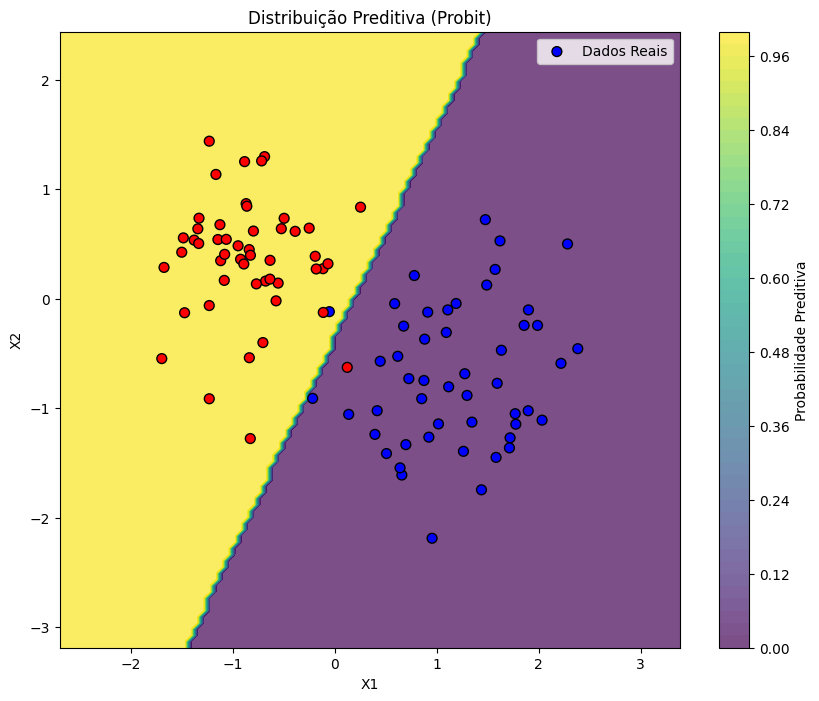

In [33]:
plot_distribuicao_preditiva(X[:, :2], y, theta_MAP, metodo='probit')